In [2]:
#Description of the data
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

df = pd.read_csv('ratings.csv')

/var/folders/j6/rzgm__cn4mz7qr7w0g71wb9w0000gn/T/ipykernel_29862/4096538559.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ratings.csv')


### Data description

For this project, the data comes from two websites: BeerAdvocate and RateBeer. 
There are different file's type: 

ADD DESCRIPTION

EVERY TIME: DO: BA,RB, COMBINED
- beers.csv : the different beers, their mean rating, style (VOIR)
- breweries.csv
- users.csv
- ratings.txt
- reviews.txt

In order to be able to use the ratings, the text file was converted into csv using the script txt-to-csv.py. 

TODO: Description of each feature, if we use it or not, and then can observe them with visualization if use them

In [6]:
df_rb = pd.read_csv('./RateBeer/ratings.csv')

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7122069,Svejk Blonde,220897,Svejk Beer Garden,17155,Pale Lager,NaN,1411034400,Travlr,83882,3,6,2,5,10,2.6,"Draft at the source. Clear golden color, fluff..."
7122070,Svejk Blonde,220897,Svejk Beer Garden,17155,Pale Lager,NaN,1385895600,TBone,10233,2,5,2,6,10,2.5,"Tap @brewpub, TiraneClear golden color, good c..."
7122071,Svejk Dark,220898,Svejk Beer Garden,17155,Dunkel/Tmavý,NaN,1415098800,Rob_D_UK,257161,3,4,2,5,9,2.3,In their beer garden after a walking tour arou...
7122072,Svejk Dark,220898,Svejk Beer Garden,17155,Dunkel/Tmavý,NaN,1410861600,Travlr,83882,3,5,1,4,6,1.9,"Draft at the source. Hazy maroon color, tan he..."


In [26]:
sorted(df_rb['rating'].unique()) #Precision: 0.1

[0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0]

In [8]:
df_ba=pd.read_csv('./BeerAdvocate/ratings.csv')

In [25]:
sorted(df_ba['rating'].unique())  #Precision : 0.01

[1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.13,
 1.14,
 1.15,
 1.16,
 1.17,
 1.18,
 1.19,
 1.2,
 1.21,
 1.22,
 1.23,
 1.24,
 1.25,
 1.26,
 1.27,
 1.28,
 1.29,
 1.3,
 1.31,
 1.32,
 1.33,
 1.34,
 1.35,
 1.36,
 1.37,
 1.38,
 1.39,
 1.4,
 1.41,
 1.42,
 1.43,
 1.44,
 1.45,
 1.46,
 1.47,
 1.48,
 1.49,
 1.5,
 1.51,
 1.52,
 1.53,
 1.54,
 1.55,
 1.56,
 1.57,
 1.58,
 1.59,
 1.6,
 1.61,
 1.62,
 1.63,
 1.64,
 1.65,
 1.66,
 1.67,
 1.68,
 1.69,
 1.7,
 1.71,
 1.72,
 1.73,
 1.74,
 1.75,
 1.76,
 1.77,
 1.78,
 1.79,
 1.8,
 1.81,
 1.82,
 1.83,
 1.84,
 1.85,
 1.86,
 1.87,
 1.88,
 1.89,
 1.9,
 1.91,
 1.92,
 1.93,
 1.94,
 1.95,
 1.96,
 1.97,
 1.98,
 1.99,
 2.0,
 2.01,
 2.02,
 2.03,
 2.04,
 2.05,
 2.06,
 2.07,
 2.08,
 2.09,
 2.1,
 2.11,
 2.12,
 2.13,
 2.14,
 2.15,
 2.16,
 2.17,
 2.18,
 2.19,
 2.2,
 2.21,
 2.22,
 2.23,
 2.24,
 2.25,
 2.26,
 2.27,
 2.28,
 2.29,
 2.3,
 2.31,
 2.32,
 2.33,
 2.34,
 2.35,
 2.36,
 2.37,
 2.38,
 2.39,
 2.4,
 2.41,
 2.42,
 2.43,
 2.44,


In [3]:
#Header of each dataset + description of their features (range, type of data (discrete or not?) etc..)

df.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,website,Unnamed: 0
0,Régab,1142544,Societe des Brasseries du Gabon (SOBRAGA),1037262,Pale Lager,4.5,1440064800,nmann08,101495,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",1,NaN
1,Barelegs Brew,1019590,Strangford Lough Brewing Company Ltd,4959,Golden Ale/Blond Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,1,NaN
2,Barelegs Brew,1019590,Strangford Lough Brewing Company Ltd,4959,Golden Ale/Blond Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",1,NaN
3,Barelegs Brew,1019590,Strangford Lough Brewing Company Ltd,4959,Golden Ale/Blond Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,1,NaN
4,Barelegs Brew,1019590,Strangford Lough Brewing Company Ltd,4959,Golden Ale/Blond Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",1,NaN


In [24]:
sorted (df_ba['abv'].unique())

[0.04,
 0.05,
 0.08,
 0.2,
 0.25,
 0.3,
 0.38,
 0.4,
 0.45,
 0.49,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.4,
 1.7,
 1.8,
 2.2,
 2.25,
 2.98,
 3.0,
 3.13,
 3.2,
 3.25,
 3.45,
 3.5,
 3.6,
 3.65,
 3.7,
 3.71,
 3.8,
 4.0,
 4.08,
 4.1,
 4.13,
 4.15,
 4.17,
 4.2,
 4.21,
 4.23,
 4.31,
 4.32,
 4.35,
 4.41,
 4.45,
 4.46,
 4.48,
 4.5,
 4.56,
 4.59,
 4.61,
 4.62,
 4.66,
 4.67,
 4.7,
 4.73,
 4.8,
 4.83,
 4.85,
 4.89,
 4.91,
 4.94,
 4.98,
 5.04,
 5.05,
 5.07,
 5.09,
 5.12,
 5.13,
 5.16,
 5.18,
 5.19,
 5.21,
 5.31,
 5.33,
 5.35,
 5.36,
 5.38,
 5.42,
 5.43,
 5.45,
 5.51,
 5.52,
 5.56,
 5.57,
 5.68,
 5.69,
 5.72,
 5.73,
 5.74,
 5.76,
 5.78,
 5.84,
 5.85,
 5.86,
 5.88,
 5.93,
 5.94,
 5.95,
 5.98,
 6.0,
 nan,
 0.01,
 0.1,
 0.5,
 0.65,
 1.2,
 1.25,
 1.3,
 1.5,
 1.9,
 2.0,
 2.08,
 2.1,
 2.16,
 2.3,
 2.4,
 2.5,
 2.6,
 2.63,
 2.7,
 2.75,
 2.8,
 2.89,
 2.9,
 3.1,
 3.14,
 3.22,
 3.27,
 3.3,
 3.32,
 3.33,
 3.4,
 3.44,
 3.54,
 3.55,
 3.56,
 3.59,
 3.61,
 3.75,
 3.79,
 3.81,
 3.82,
 3.83,
 3.85,
 3.87,
 3.88,
 3.9,
 3

In [22]:
sorted(df_rb['abv'].unique())

[0.9,
 1.15,
 1.9,
 2.7,
 3.0,
 3.4,
 3.5,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.85,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 7.0,
 7.2,
 7.4,
 7.5,
 8.0,
 8.3,
 8.4,
 8.5,
 8.7,
 8.8,
 9.0,
 9.1,
 9.26,
 9.6,
 9.8,
 10.0,
 nan,
 0.01,
 0.04,
 0.05,
 0.09,
 0.1,
 0.2,
 0.25,
 0.3,
 0.35,
 0.38,
 0.4,
 0.41,
 0.45,
 0.48,
 0.49,
 0.5,
 0.6,
 0.7,
 0.8,
 0.99,
 1.0,
 1.1,
 1.2,
 1.25,
 1.3,
 1.35,
 1.4,
 1.5,
 1.6,
 1.7,
 1.75,
 1.8,
 2.0,
 2.1,
 2.16,
 2.2,
 2.25,
 2.26,
 2.3,
 2.33,
 2.35,
 2.4,
 2.5,
 2.6,
 2.61,
 2.75,
 2.8,
 2.85,
 2.89,
 2.9,
 2.98,
 2.99,
 3.01,
 3.05,
 3.1,
 3.14,
 3.15,
 3.16,
 3.2,
 3.25,
 3.26,
 3.3,
 3.31,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.41,
 3.43,
 3.44,
 3.45,
 3.47,
 3.51,
 3.53,
 3.55,
 3.59,
 3.6,
 3.61,
 3.65,
 3.67,
 3.68,
 3.69,
 3.71,
 3.73,
 3.75,
 3.82,
 3.83,
 3.84,
 3.85,
 3.88,
 3.93,
 3.94,
 3.95,
 3.96,
 3.97,
 3.9

In [ ]:
#Should we also remove from the breweries?

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='abv'>

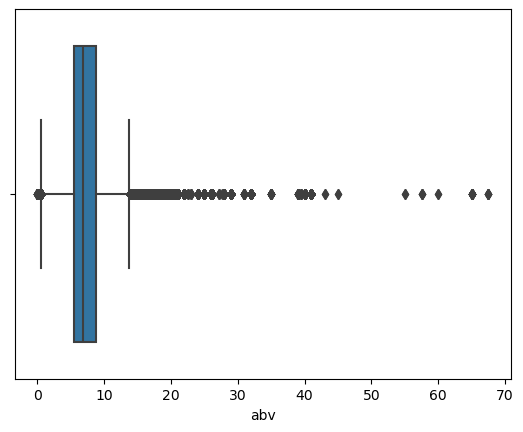

In [73]:
sns.boxplot(df_ba, x="abv")


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='abv'>

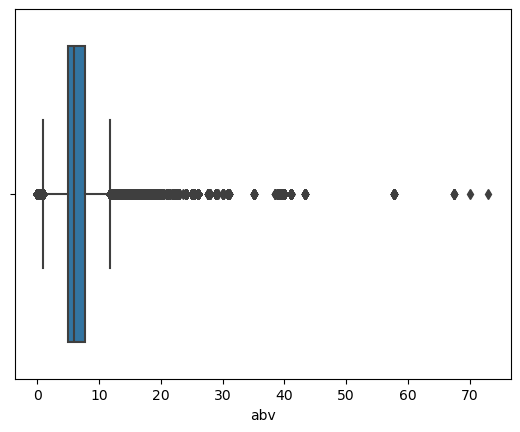

In [74]:
sns.boxplot(df_rb, x="abv")

In [32]:
sorted(df_ba['overall'].unique())

[1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 nan,
 4.75,
 5.0]

In [33]:
sorted(df_rb['overall'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [39]:
sorted(df['palate'].unique())

[1.0,
 1.25,
 1.5,
 1.75,
 3.25,
 3.5,
 4.0,
 nan,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.75,
 4.25,
 4.5,
 4.75,
 5.0]

In [40]:
sorted(df['taste'].unique())

[1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.75,
 4.0,
 nan,
 2.5,
 3.0,
 3.25,
 3.5,
 3.75,
 4.25,
 4.5,
 4.75,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0]

In [41]:
sorted(df['appearance'].unique()) 

[1.0,
 1.5,
 1.75,
 2.25,
 2.5,
 3.0,
 3.25,
 4.0,
 nan,
 1.25,
 2.0,
 2.75,
 3.5,
 3.75,
 4.25,
 4.5,
 4.75,
 5.0]

In [42]:
sorted(df['aroma'].unique())

[1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 nan,
 4.25,
 4.5,
 4.75,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0]

rating.csv : for each rating, we have the beer and beer id, the brewery, the user name, user id and ratings of different aspects (total rating, appearance, aroma, palate, taste). We also have the alcohol content, and a text describing the beer (review). The date for which the review has been made is also present. Its format needs to be changed, to have a proper date format and be able to extract the year from it.

We can observe that the ratings go from 0.5 to 5, with a precision of 0.1 for RateBeer and 1 to 5 with a precision of 0.01 for BeerAdvocate.
In order to be able to compare the datasets, it will be important to normalize them. The normalization will be done by year, and for each dataset separately. SEE SECTION.. + SEE IF WANT TO ROUND BA. It will allow to take into account the overall variation of ratings during the years, which doesn't represent the quality of each beer. 

We can also notice that the abv, which is the alcohol content, reaches some very big values. As it is impossible for beers, we will remove the ratings for beers that have an abv> 20. We choose this threshold, because it is really hard for the yeast to survive at alcohol content higher than 15°. Moreover, the histograms of abv for each dataset show that most of the beers have ABV <20. > SEE REMOVE THIS; MAYBE OTHER THR??

The overall rating is /5 for BeerAdvocate and /20 for Ratebeer. Since quarter of points are present for Beer Advocates, do min/max normalization for both. Then, the ratings will be normalized separately. 

Since the ratings for the characteristics of the beer are not in the same scale (some /10, and some /5), we will perform min-max regularisation to be able to compare them when we will study the effect of each parameter on the overal rating. 

We also remark that the style are not the same labels for each website. The association of the different styles together will be described in part ADD PART. 


SEE BETTER WAY TO GET ALL THE VALUES SORTES

In [43]:
df_beers_ba= pd.read_csv('./BeerAdvocate/beers.csv')
df_beers_ba

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN
280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN
280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN


In [44]:
df_beers_rb= pd.read_csv('./RateBeer/beers.csv')
df_beers_rb

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN


We remark that some beers have no review. Removing them does not seem useful for now, since they can still be used to study the country of origin for the breweries for example. However, we expect them no to be very relevant for our studies on the number of reviews.

OR REMOVE THEM?

The other parameters that interest us are also found in ratings.csv. Therefore, this file only gives us new informations on the non-rated beers. 

In [45]:
df_breweries_ba= pd.read_csv('./BeerAdvocate/breweries.csv')
df_breweries_ba

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16754,5023,Aruba,Aruba Brewing,0
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20


In [46]:
df_breweries_rb= pd.read_csv('./RateBeer/breweries.csv')
df_breweries_rb

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3
...,...,...,...,...
24184,28180,Albania,Shoqeria Picana,1
24185,1107,Albania,Stefani & Co,11
24186,9355,Albania,Hotel Martini,1
24187,9928,Albania,Rozafa Brewery,1


This dataset will give us the location of the brewery. It will be particularly useful when we study the origin of the preferred breweries. We will need to be careful and associate correctly the breweries that are present in the two datasets. For that, we will use the matched_beer_data file that associates the same breweries together. 

SAY WHERE DO IT

In [47]:
df_users_ba= pd.read_csv('./BeerAdvocate/users.csv')
df_users_ba

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


In [48]:
df_users_rb= pd.read_csv('./RateBeer/users.csv')
df_users_rb

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


In this dataset, the main information used will be the location of the user. It will allow us to extract the preferred beer per country for example. 

### Sanity check

In order to use the data, we must make sure that the range for each data is appropriate. We remove the outliers when needed.

We also verify the presence of NaN, without removing them for now. Indeed, even if some aspects of the ratings are missing, we can still use the datapoint for the project (for example for the parts where only the overall rating is used). We will therefore keep all the data that contains a rating. For some applications, for example to perform the study of the different parameters' influence on the overall rating, the NaN will be ignored.

In [50]:
#NaN

df.isna().sum()

beer_name             0
beer_id               0
brewery_name          0
brewery_id            0
style                 0
abv              346266
date                  0
user_name            31
user_id               0
appearance      3620688
aroma           3620688
palate          3620688
taste           3620688
overall         3620688
rating                0
text            5673637
website               0
Unnamed: 0      8371068
dtype: int64

This is interesting to note that there is exactly the same number of missing values for the ratings of the different aspects of the beer. It is probably due to the fact that there are two "levels" of rating: an overall grade, that would be quicker to make, or a rating for each aspect (in which case the user has to respond to all the fields). 

When we will study the effect of each aspect, those NaN for those and for abv will be ignored. However, those values are not relevant for all our research, so we will keep all the values in a first time. 

The text review and usernames won't be analyzed eather, so the NaN are not problematic (REMOVE THE TEXT??)



In [ ]:
# Removal of outliers
# The only outliers found from our preliminary research are the ones for abv. We filter those, to remove datapoints where abv is superior to 20. 

In [51]:
df_correct=df.loc[df['abv']<=20]

In [53]:
sorted(df_correct['abv'].unique())

[0.01,
 0.04,
 0.05,
 0.08,
 0.09,
 0.1,
 0.2,
 0.25,
 0.3,
 0.35,
 0.38,
 0.4,
 0.41,
 0.45,
 0.48,
 0.49,
 0.5,
 0.6,
 0.65,
 0.7,
 0.8,
 0.9,
 0.99,
 1.0,
 1.1,
 1.15,
 1.2,
 1.25,
 1.3,
 1.35,
 1.4,
 1.5,
 1.6,
 1.7,
 1.75,
 1.8,
 1.9,
 2.0,
 2.08,
 2.1,
 2.16,
 2.2,
 2.25,
 2.26,
 2.3,
 2.33,
 2.35,
 2.4,
 2.5,
 2.6,
 2.61,
 2.63,
 2.7,
 2.75,
 2.8,
 2.85,
 2.89,
 2.9,
 2.98,
 2.99,
 3.0,
 3.01,
 3.05,
 3.1,
 3.13,
 3.14,
 3.15,
 3.16,
 3.2,
 3.22,
 3.25,
 3.26,
 3.27,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.41,
 3.43,
 3.44,
 3.45,
 3.47,
 3.5,
 3.51,
 3.53,
 3.54,
 3.55,
 3.56,
 3.59,
 3.6,
 3.61,
 3.65,
 3.67,
 3.68,
 3.69,
 3.7,
 3.71,
 3.73,
 3.75,
 3.79,
 3.8,
 3.81,
 3.82,
 3.83,
 3.84,
 3.85,
 3.87,
 3.88,
 3.9,
 3.93,
 3.94,
 3.95,
 3.96,
 3.97,
 3.98,
 3.99,
 4.0,
 4.01,
 4.02,
 4.03,
 4.04,
 4.05,
 4.06,
 4.07,
 4.08,
 4.09,
 4.1,
 4.11,
 4.12,
 4.13,
 4.14,
 4.15,
 4.16,
 4.17,
 4.18,
 4.19,
 4.2,
 4.21,
 4.22,
 4.23,
 4.25,
 4.26,

I think the best would be to do those normalization before the merging...

In [65]:
#Normalization per year

#Get the year

df['date'] = pd.to_datetime(df.date, unit='s')
df['year'] = df['date'].dt.strftime('%Y')

In [66]:
#Normalization per year
#DESCRIBE MORE

df['zscore'] = (df['rating'] - df.groupby(['year', 'website'])['rating'].transform('mean'))/df.groupby(['year', 'website'])['rating'].transform('std')


In [54]:
#Min-max normalization for the grades --> Change with z-score?

df['overall'] = (df['overall'] - df.groupby(['website'])['overall'].transform('min'))/(df.groupby(['website'])['overall'].transform('max') - df.groupby(['website'])['overall'].transform('min'))


In [63]:
df['palate'] = (df['palate'] - df.groupby(['website'])['palate'].transform('min'))/(df.groupby(['website'])['palate'].transform('max') - df.groupby(['website'])['palate'].transform('min'))


In [64]:


df['taste'] = (df['taste'] - df.groupby(['website'])['taste'].transform('min'))/(df.groupby(['website'])['taste'].transform('max') - df.groupby(['website'])['taste'].transform('min'))


df['appearance'] = (df['appearance'] - df.groupby(['website'])['appearance'].transform('min'))/(df.groupby(['website'])['appearance'].transform('max') - df.groupby(['website'])['appearance'].transform('min'))

df['aroma'] = (df['aroma'] - df.groupby(['website'])['aroma'].transform('min'))/(df.groupby(['website'])['aroma'].transform('max') - df.groupby(['website'])['aroma'].transform('min'))




### Data motification

We apply the mentioned modifications: removal of beers with unconsistent ABV, and normalization of each score (ratings and all sub-scores)

### Visualization of the data


Now, let's visualize the data. It allows to give us a first idea of expected results, and to verify correlation between different features. 

In [ ]:
#Visualization of the data

#Each feature according to the rating

#Nb of reviews according to the rating? Avec leur trucs?

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='aroma', ylabel='rating'>

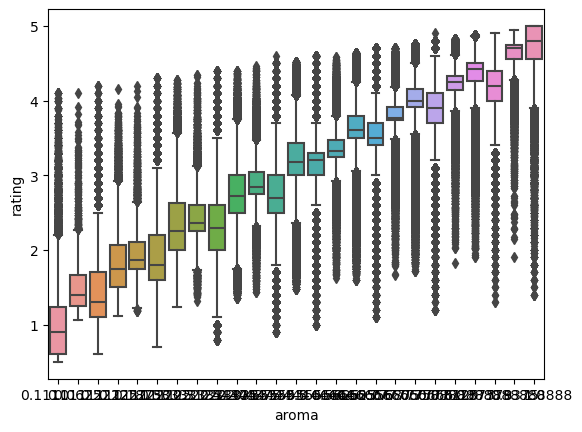

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='aroma', ylabel='rating'>

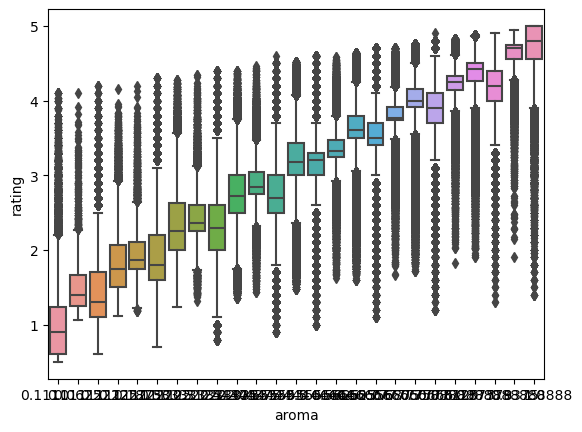

In [86]:
#Visualization of each sub-rating with the total rating

sns.boxplot(data=df, x='aroma', y='rating')


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='appearance', ylabel='rating'>

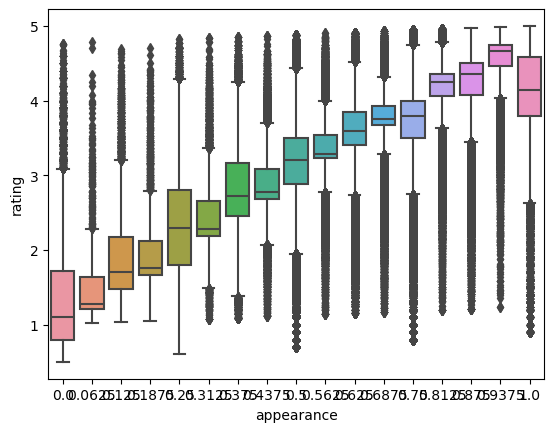

In [87]:
sns.boxplot(data=df, x='appearance', y='rating')


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='taste', ylabel='rating'>

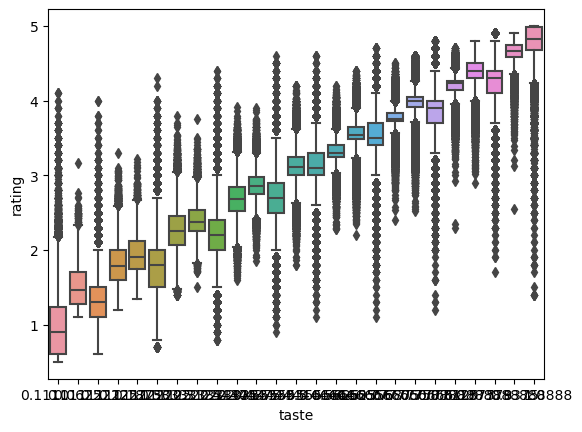

In [88]:
sns.boxplot(data=df, x='taste', y='rating')


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='overall', ylabel='rating'>

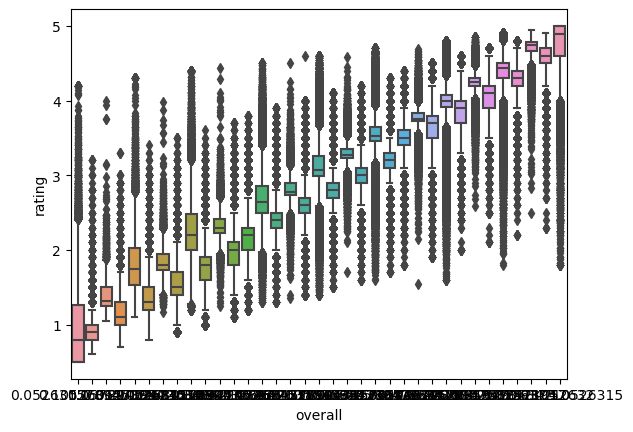

In [89]:
sns.boxplot(data=df, x='overall', y='rating')


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='palate', ylabel='rating'>

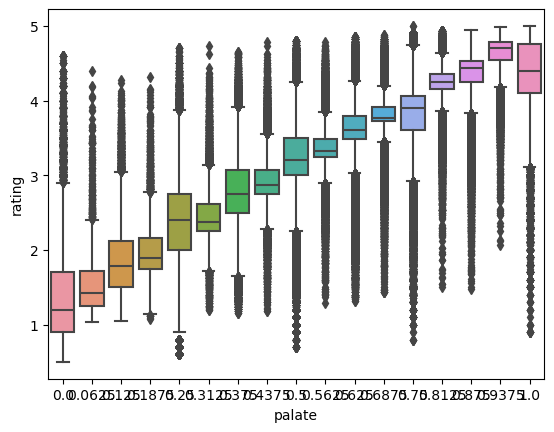

In [90]:
sns.boxplot(data=df, x='palate', y='rating')


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='abv', ylabel='rating'>

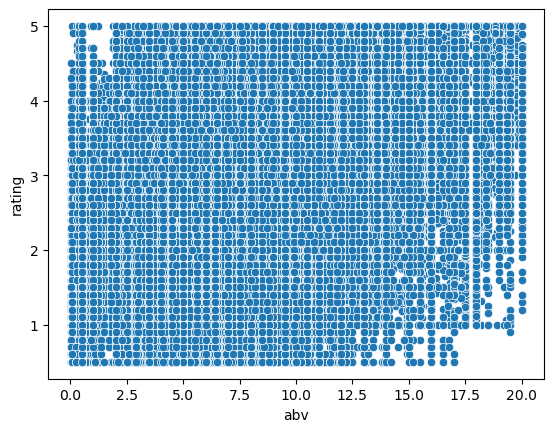

In [91]:
sns.scatterplot(data=df_correct, x='abv', y='rating')

No evident correlation...

In [93]:
#Number of ratings per year

nb_per_year=df.groupby('year')['rating'].count().reset_index(name='counts')



In [94]:
nb_per_year

,year,counts
0,1996,1
1,1998,134
2,1999,83
3,2000,2802
4,2001,20356
5,2002,99210
6,2003,163159
7,2004,228369
8,2005,297548
9,2006,379225


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


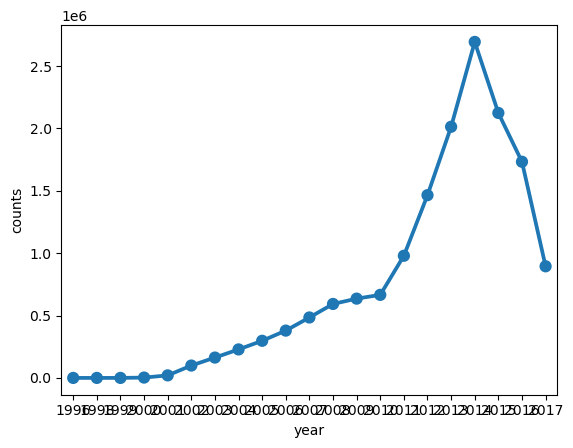

In [98]:
#Rating per year

ax = sns.pointplot(nb_per_year,x='year', y='counts')

In [99]:
#Distribution of the number of ratings per users?? Or someone already did it?
df_users=pd.read_csv('users.csv')

In [100]:
df_users

,nbr_ratings,user_id,user_name,joined,location,nbr_reviews
0,1890,175852,Manslow,1.337508e+09,Poland,NaN
1,89,442761,MAGICuenca91,1.484046e+09,Spain,NaN
2,169,288889,Sibarh,1.384600e+09,Poland,NaN
3,3371,250510,fombe89,1.363950e+09,Spain,NaN
4,13043,122778,kevnic2008,1.296644e+09,Germany,NaN
...,...,...,...,...,...,...
220853,1,everman.532342,Everman,1.291115e+09,"United States, California",1.0
220854,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California",1.0
220855,1,kyungsup.982216,Kyungsup,1.430561e+09,NaN,0.0
220856,1,joetex.800347,JoeTex,1.400234e+09,"United States, California",1.0


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


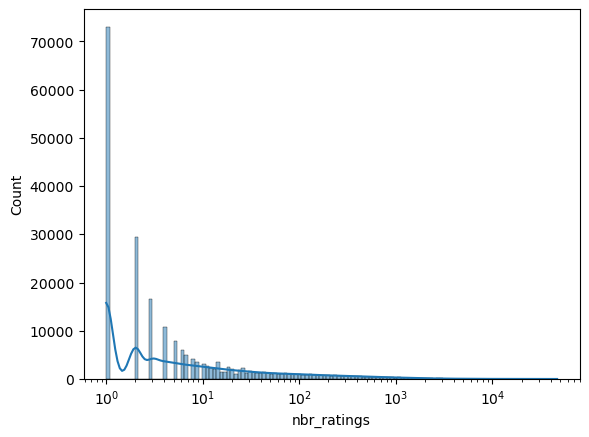

In [103]:
ax = sns.histplot(df_users['nbr_ratings'], kde=True, log_scale = True)

In [ ]:
#Distribution very different from the merge dataset... and a little bit weird?
#

In [ ]:
#Do by location already?

### Correlation study

Let's compute some correlation coefficients for the data that seem related to each other. 

In [106]:
#Remove lines with na

df_no_na= df.dropna()

In [107]:

X = df_no_na[['taste', 'overall','palate','appearance']] # Features (ADD LAST ONES)
y = df_no_na[['rating']] #target 

from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


taste         0.773306
overall       1.000000
palate        0.352742
appearance    0.212399
dtype: float64

In [108]:

X = df_no_na[['taste', 'overall','palate','appearance', 'aroma']] # Features (ADD LAST ONES)
y = df_no_na[['rating']] #target 

from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


taste         0.773041
overall       1.000000
palate        0.353006
appearance    0.212593
aroma         0.600235
dtype: float64

In [118]:
#Pearson coefficient for abv
df_no_na['rating'].corr(df_no_na['abv'])

0.3980444939099732

In [ ]:
#Computations

#Do for all data and then for different locations--> observe some differences